In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
sheet_id = "1IV3YtMCBOBag32ZFbUQx3Z8yWT8l391x2HV-wfda8o4"
sheet_name = "H358"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

In [10]:
df = df.dropna()
df

,file,modification,cell_line,time,cells_manual,micronuclei_manual,cells_stardist_prediction,micronuclei_stardist_prediction,cells_lindsay,micronuclei_lindsay
0,s01,H358,H358,24h,1295,42,1274,41,150,7
1,s02,H358,H358,24h,1221,35,1140,28,150,6
2,s03,H358,H358,24h,1267,58,1192,54,150,9
3,s04,H358,H358,24h,1446,49,1369,44,150,11
4,s05,H358,H358,24h,1237,51,1182,44,150,10
5,s06,H358,H358,24h,1336,35,1279,40,150,5
6,s07,H358-GFP,H358,24h,899,37,856,31,150,10
7,s08,H358-GFP,H358,24h,931,54,858,47,150,15
8,s09,H358-GFP,H358,24h,1043,53,988,56,150,13
9,s10,H358-GFP,H358,24h,1132,56,1075,50,150,13


In [11]:
# Create micronuclei_cell_ratio for both manual and stardist
df["manual"] = df["micronuclei_manual"]/df["cells_manual"]
df["micronuclAI"] = df["micronuclei_stardist_prediction"]/df["cells_stardist_prediction"]

# Create a column for the difference between manual and stardist
df["diff"] = abs(df["manual"] - df["micronuclAI"])
df["res"] = df["micronuclAI"] - df["manual"]
df["apd"] = df["diff"]/((df["manual"]+df["micronuclAI"])/2)
df["ba"] = (df["manual"]+df["micronuclAI"])/2
df

,file,modification,cell_line,time,cells_manual,micronuclei_manual,cells_stardist_prediction,micronuclei_stardist_prediction,cells_lindsay,micronuclei_lindsay,manual,micronuclAI,diff,res,apd,ba
0,s01,H358,H358,24h,1295,42,1274,41,150,7,0.032432,0.032182,0.000250,-0.000250,0.007748,0.032307
1,s02,H358,H358,24h,1221,35,1140,28,150,6,0.028665,0.024561,0.004104,-0.004104,0.154195,0.026613
2,s03,H358,H358,24h,1267,58,1192,54,150,9,0.045777,0.045302,0.000475,-0.000475,0.010440,0.045540
3,s04,H358,H358,24h,1446,49,1369,44,150,11,0.033887,0.032140,0.001746,-0.001746,0.052898,0.033013
4,s05,H358,H358,24h,1237,51,1182,44,150,10,0.041229,0.037225,0.004004,-0.004004,0.102066,0.039227
5,s06,H358,H358,24h,1336,35,1279,40,150,5,0.026198,0.031274,0.005077,0.005077,0.176671,0.028736
6,s07,H358-GFP,H358,24h,899,37,856,31,150,10,0.041157,0.036215,0.004942,-0.004942,0.127744,0.038686
7,s08,H358-GFP,H358,24h,931,54,858,47,150,15,0.058002,0.054779,0.003224,-0.003224,0.057166,0.056390
8,s09,H358-GFP,H358,24h,1043,53,988,56,150,13,0.050815,0.056680,0.005865,0.005865,0.109125,0.053748
9,s10,H358-GFP,H358,24h,1132,56,1075,50,150,13,0.049470,0.046512,0.002958,-0.002958,0.061644,0.047991


In [12]:
# Melt the dataframe
df_melted = df.melt(id_vars=["file", "modification"], value_vars=["manual", "micronuclAI"], var_name="micronuclei_cell_ratio_type", value_name="micronuclei_cell_ratio")
df_melted

,file,modification,micronuclei_cell_ratio_type,micronuclei_cell_ratio
0,s01,H358,manual,0.032432
1,s02,H358,manual,0.028665
2,s03,H358,manual,0.045777
3,s04,H358,manual,0.033887
4,s05,H358,manual,0.041229
5,s06,H358,manual,0.026198
6,s07,H358-GFP,manual,0.041157
7,s08,H358-GFP,manual,0.058002
8,s09,H358-GFP,manual,0.050815
9,s10,H358-GFP,manual,0.049470


/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_84899/4260166598.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


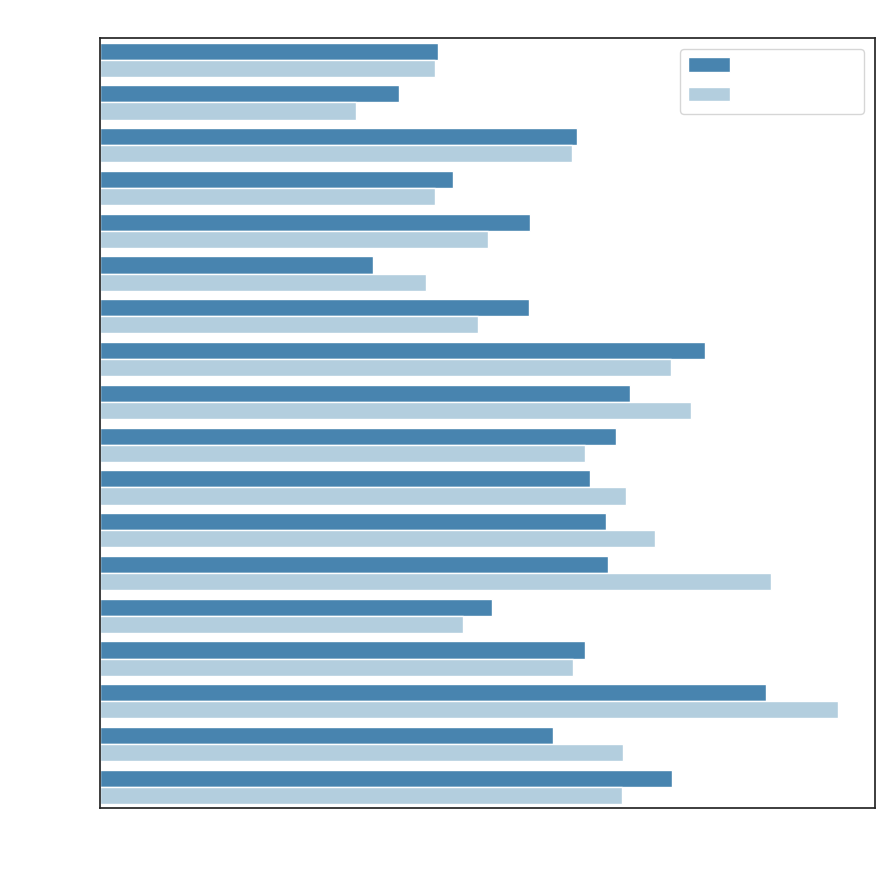

In [13]:
sns.set(rc={'ytick.labelcolor':'white','xtick.labelcolor':'white', 'text.color':'white'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_melted,y="file", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type", palette="Blues_r", ax=ax)
ax.legend(loc='upper right', fontsize=15, labelcolor="white")
ax.set_title("H358 manual vs micronuclAI", color="white", fontsize=20)
ax.set_xlabel("CIN score", color="white", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("File", color="white", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/H358_comparison_EFB0_SS_W3_stardist_rf06_all_balanced_model4.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/H358_comparison_EFB0_SS_W3_stardist_rf06_all_balanced_model4.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_7957/3851761164.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


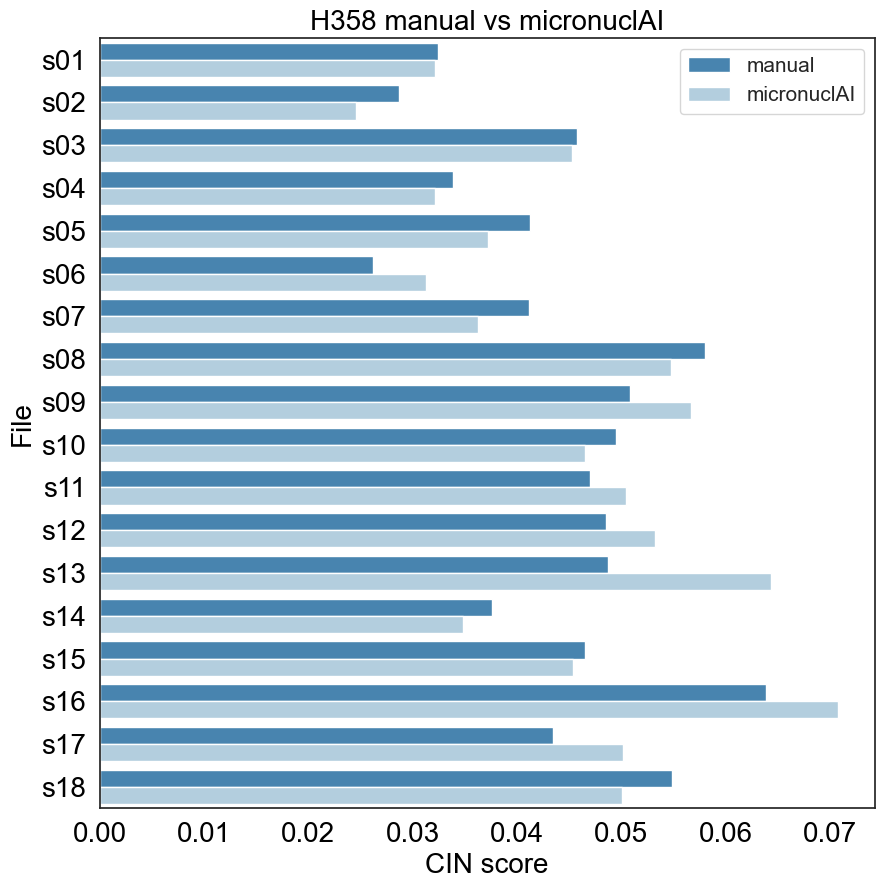

In [7]:
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_melted,y="file", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type", palette="Blues_r", ax=ax)
ax.legend(loc='upper right', fontsize=15)
ax.set_title("H358 manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN score", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("File", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/H358_comparison_EFB0_SS_W3_stardist_rf06_all_balanced_model4_black.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/H358_comparison_EFB0_SS_W3_stardist_rf06_all_balanced_model4_black.pdf", dpi=300, bbox_inches='tight', transparent=True)

['s01' 's02' 's09' 's06' 's04' 's14' 's17' 's16' 's12' 's03']


/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_84899/1689360831.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0)


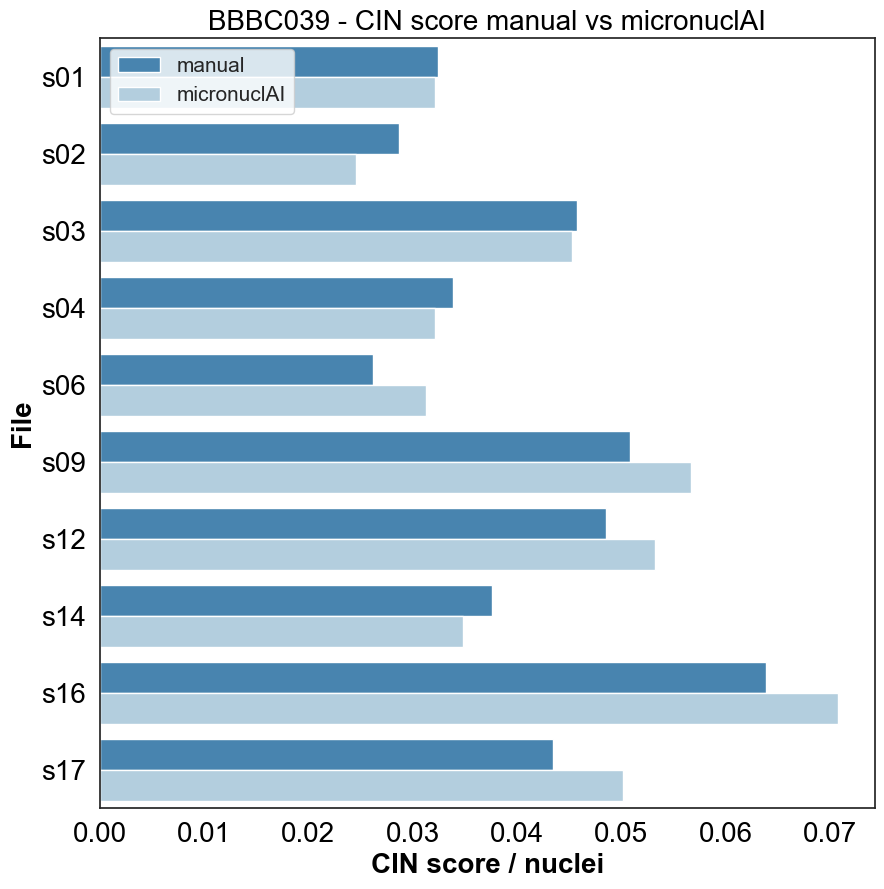

In [14]:
# choose 10 values at random from a numpy array
np.random.seed(42)
random_files = np.random.choice(df_melted["file"].unique(), 10, replace=False)
print (random_files)
# Select the rows where the file is in random_files
df_melted_sample = df_melted[df_melted["file"].isin(random_files)]

# Plot the ratio
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_melted_sample, y="file", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type", palette="Blues_r", ax=ax)
ax.legend(loc='upper left', fontsize=15, markerscale=2)
ax.set_title("BBBC039 - CIN score manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN score / nuclei", color="black", fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0)
ax.set_ylabel("File", color="black", fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/H358_comparison_sample.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/H358_comparison_sample.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_7957/514088153.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


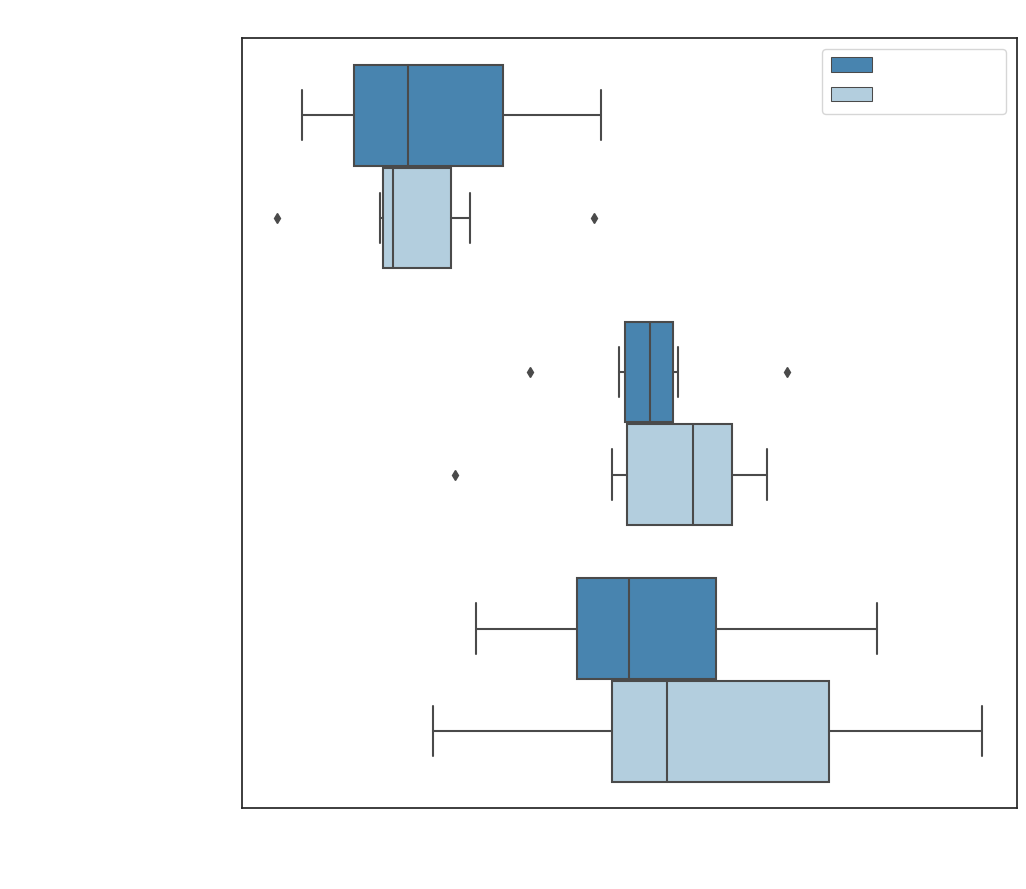

In [8]:
sns.set(rc={'ytick.labelcolor':'white','xtick.labelcolor':'white', 'text.color':'white'})
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df_melted, y="modification", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type",  palette="Blues_r")
ax.legend(loc='upper right', fontsize=15, labelcolor="white")
ax.set_title("H358 Manual vs micronuclAI", fontsize=20, color="white")
ax.set_xlabel("CIN Score", fontsize=20, color="white")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("Cell line modification", fontsize=20, color="white")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/H358_comparison_aggregated_EFB0_SS_W3_stardist_rf06_all_balanced_model4.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/H358_comparison_aggregated_EFB0_SS_W3_stardist_rf06_all_balanced_model4.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_7957/3231903619.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


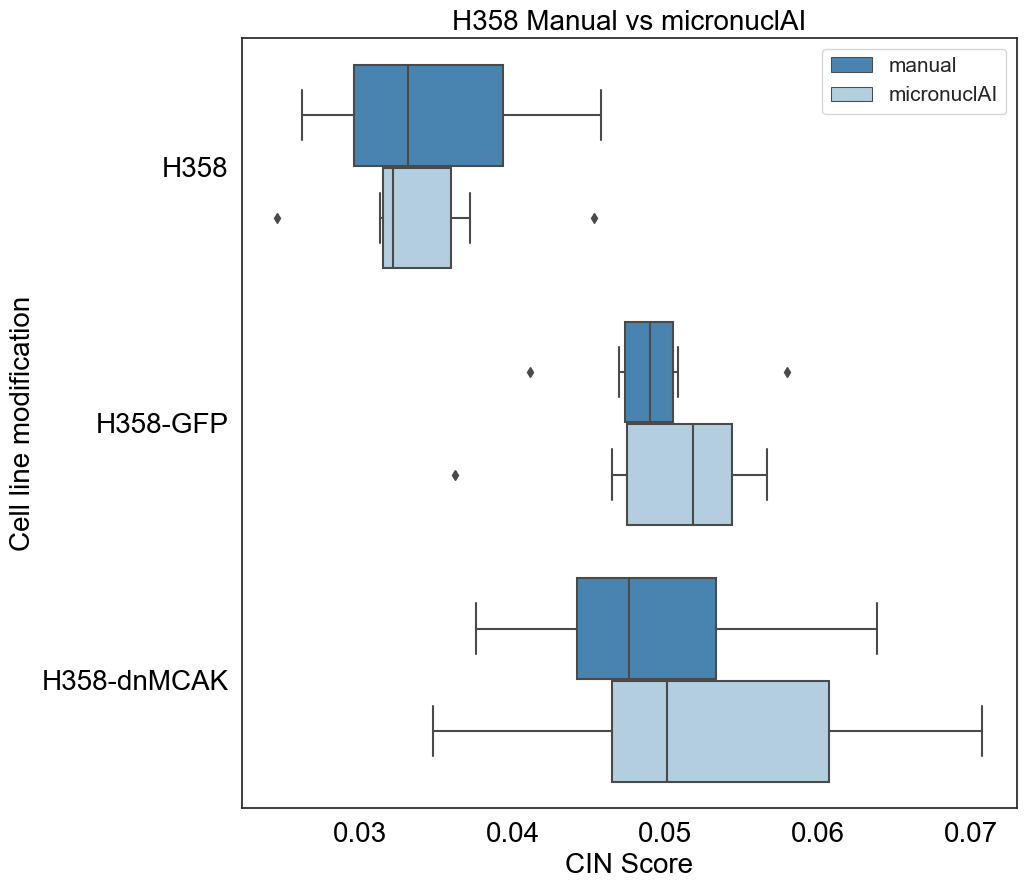

In [9]:
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df_melted, y="modification", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type",  palette="Blues_r")
ax.legend(loc='upper right', fontsize=15)
ax.set_title("H358 Manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN Score", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("Cell line modification", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/H358_comparison_aggregated_EFB0_SS_W3_stardist_rf06_all_balanced_model4_black.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/H358_comparison_aggregated_EFB0_SS_W3_stardist_rf06_all_balanced_model4_black.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_7957/578045806.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_7957/578045806.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


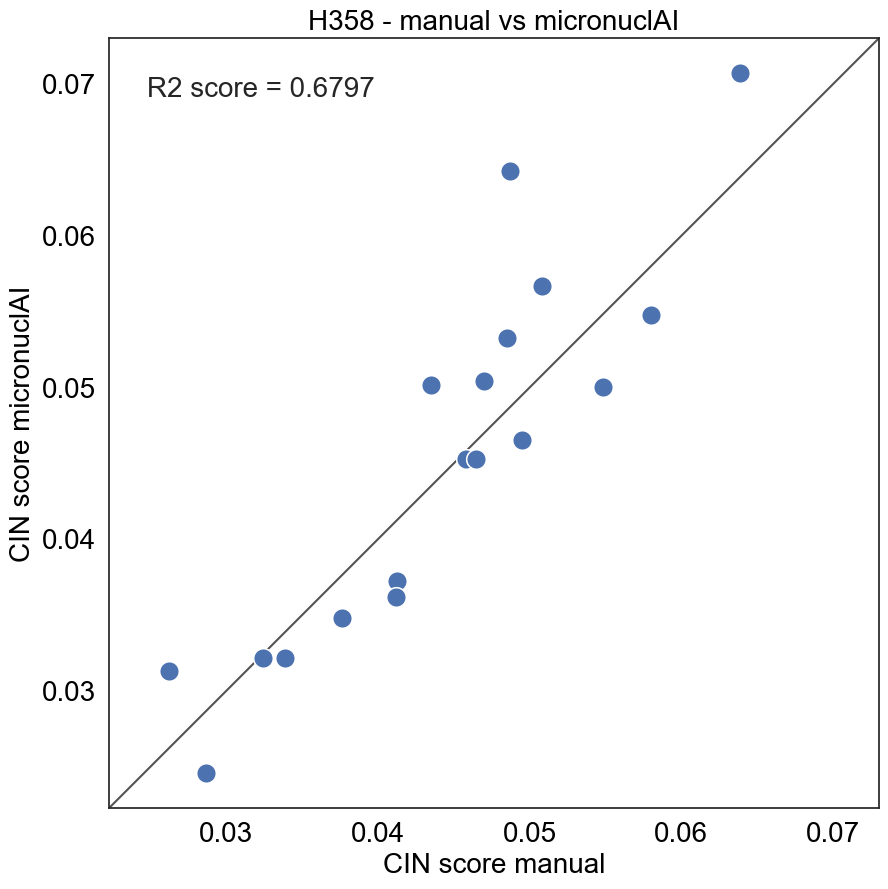

In [10]:
 # Plot manual vs micronuclAI
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="manual", y="micronuclAI", ax=ax, s=200)

# Add R2 score
r2 = r2_score(df["manual"], df["micronuclAI"])
ax.text(0.05, 0.95, f"R2 score = {r2:.4f}", transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

#Plot diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title("H358 - manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN score manual", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("CIN score micronuclAI", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

plt.show()
fig.savefig("../figures/H358_corr_Black.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/H358_corr_Black.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_7957/3944108790.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_7957/3944108790.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


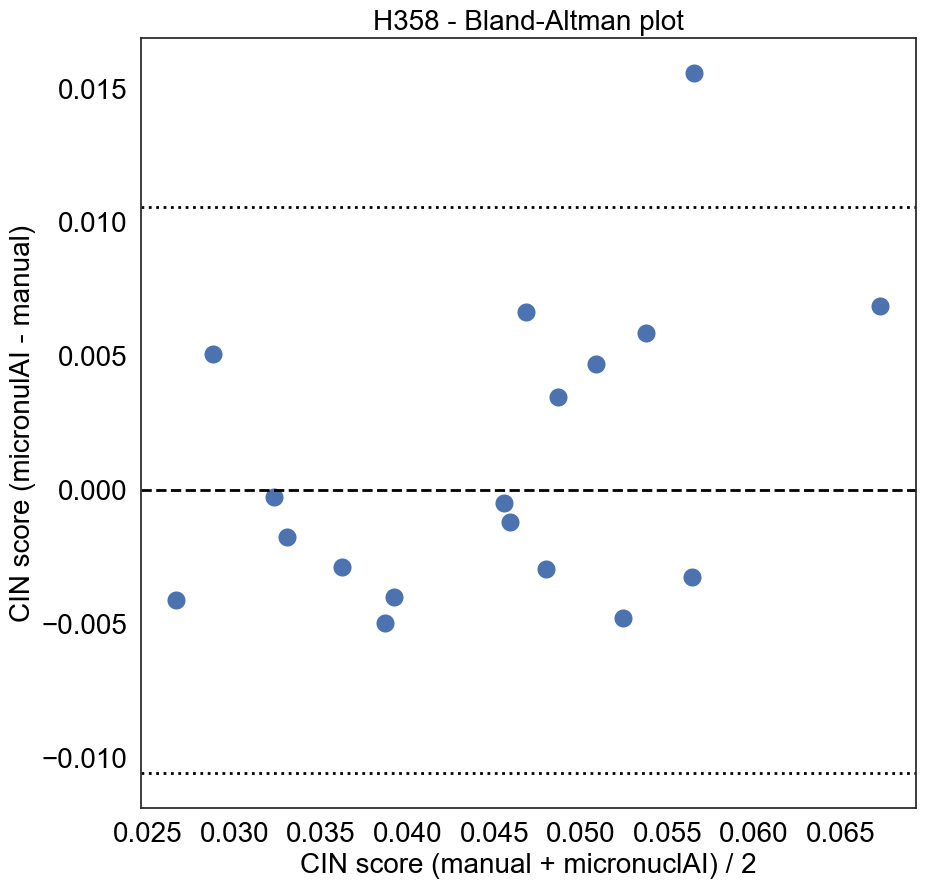

In [11]:
# Plot residuals vs apd
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="ba", y="res",ax=ax, s=200)

# Plot horizontal line at 0
ax.axhline(y=0, color='Black', linestyle='--', linewidth=2)

# Add two lines for the 0.95 confidence interval
ax.axhline(y=1.96*np.std(df["res"]), color='Black', linestyle=':', linewidth=2)
ax.axhline(y=-1.96*np.std(df["res"]), color='Black', linestyle=':', linewidth=2)

# Formating
ax.set_title("H358 - Bland-Altman plot", color="black", fontsize=20)
ax.set_xlabel("CIN score (manual + micronuclAI) / 2", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("CIN score (micronulAI - manual)", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()

plt.show()
fig.savefig("../figures/H358_BA_Black.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/H358_BA_Black.pdf", dpi=300, bbox_inches='tight', transparent=True)